In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Finite Difference Method:  
a numerical method of solving ODEs; derivatives are approximated by finite differences; approximation --> some error 

Consider a function f of t. Its derivatives can be approximated by using-
1. forward difference
2. backward difference
3. central difference, which works the best.

Under this approximation,
  
First derivative:

$$
\frac{dy}{dx} \approx \frac{y_{i+1} - y_{i-1}}{2h}
$$

Second derivative:

$$
\frac{d^2y}{dx^2} \approx \frac{y_{i-1} - 2y_i + y_{i+1}}{h^2}
$$


**Euler Method** uses forward finite difference to approximate the solution of an ODE, i.e., we can contstruct y(t) step by step from its known derivative.  
First derivative:

$$
\frac{dy}{dx} \approx \frac{y_{i+1} - y_{i}}{h}
$$  

EXAMPLE 1:
A ball is droppped from a 20m high tower and it reaches ground in 2s. Plot its altitude as a function of time.

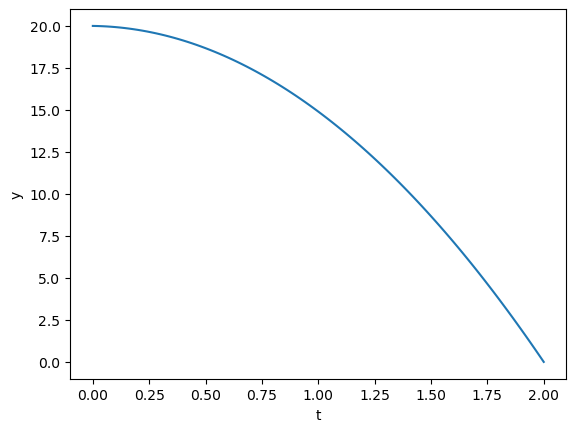

In [89]:
#we know d2y/dt2 = -g  = y[i-1] -2y[i] + y[i+1]  /  h2

n = 100
g = 9.8
t_final = 2
h = (t_final-0) / n
t = np.linspace(0, t_final, n+1)

#y-coordinate---------------------------------------------------
# Getting matrix A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1

# Get b
b = np.zeros(n+1)
b[0] = 20
b[1:-1] = -g*h**2
b[-1] = 0

# solve the linear equations
y = np.linalg.solve(A, b)

plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.show()
    



EXAMPLE 2:
Consider a SHO that starts at x=0m and its velocity is given by cos(wt). Plot its dispacement as a function of time for 19s.


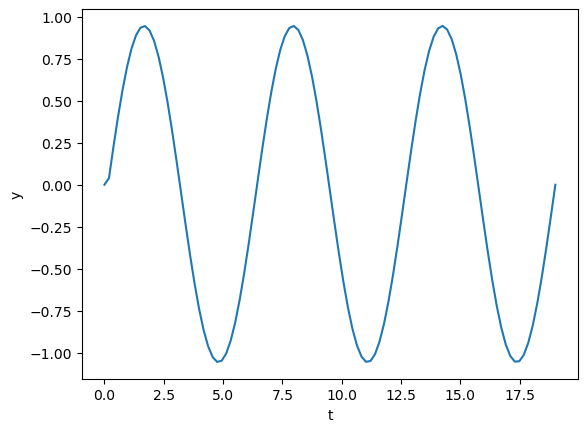

In [90]:
n = 100
g = 9.8
w = 1
t_final = 19
h = (t_final-0) / n
t = np.linspace(0, t_final, n+1)

#y-coordinate---------------------------------------------------
# Getting matrix A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i] = -1
    A[i, i+1] = 1

# Get b
b = np.zeros(n+1)
for i in range(1,n):
    b[i] = np.cos(w*t[i])*h
b[-1] = 0

# solve the linear equations
y = np.linalg.solve(A, b)

plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.show()
    

# Diffusion Equation in 1D  

$$
\rho_i^{n+1}
=
\rho_i^{n}
+
\frac{D\,\Delta t}{(\Delta x)^2}
\left(
\rho_{i+1}^{n}
-
2\rho_i^{n}
+
\rho_{i-1}^{n}
\right)
$$

With reflective walls

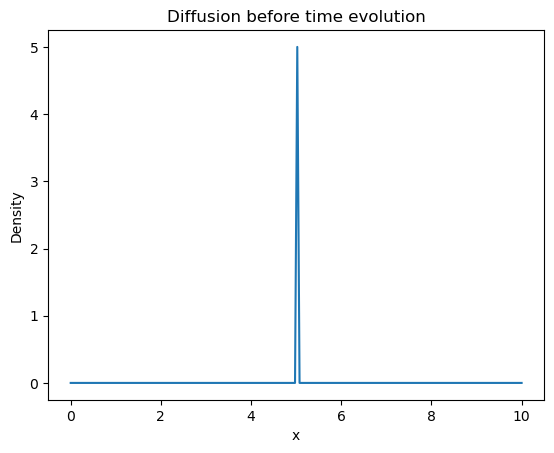

0.25


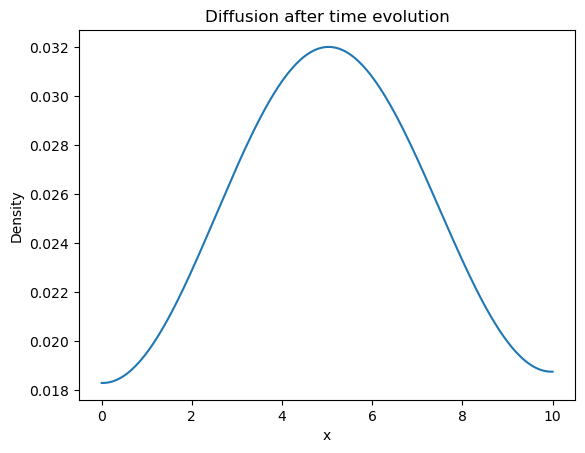

0.2518531665007476


In [91]:
L = 10
N = 200
dx = L / N
D = 1
dt = 0.4 * dx**2 / D   # stable time step
steps = 5000

x = np.linspace(0, L, N)


#initial density 
rho = np.zeros(N)
rho[N//2] = 5


plt.plot(x, rho)
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Diffusion before time evolution")
plt.show()
print(np.sum(rho) * dx)             #initial mass

# Time evolution
for n in range(steps):
    rho_new = rho.copy()
    
    for i in range(1, N-1):
        rho_new[i] = rho[i] + D * dt * (
            rho[i+1] - 2*rho[i] + rho[i-1]
        ) / dx**2
    rho_new[0] = rho_new[1]
    rho_new[-1] = rho_new[-2]

    rho = rho_new

plt.plot(x, rho)
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Diffusion after time evolution")
plt.show()
print(np.sum(rho) * dx)               #final mass

With absorptive walls

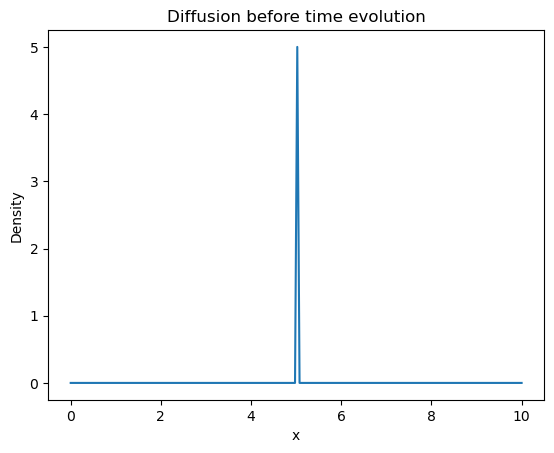

0.25


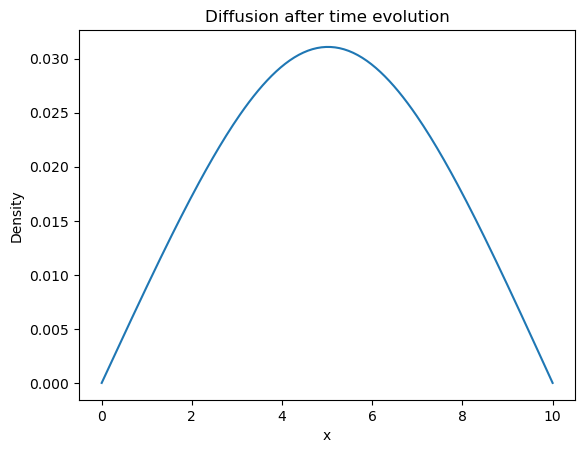

0.1921578743766857


In [92]:
L = 10
N = 200
dx = L / N
D = 1
dt = 0.4 * dx**2 / D   # stable time step
steps = 5000

x = np.linspace(0, L, N)


#initial density 
rho = np.zeros(N)
rho[N//2] = 5


plt.plot(x, rho)
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Diffusion before time evolution")
plt.show()
print(np.sum(rho) * dx )                 #initial mass


# Time evolution
for n in range(steps):
    rho_new = rho.copy()
    
    for i in range(1, N-1):
        rho_new[i] = rho[i] + D * dt * (
            rho[i+1] - 2*rho[i] + rho[i-1]
        ) / dx**2
    rho_new[0] = 0
    rho_new[-1] = 0

    rho = rho_new

plt.plot(x, rho)
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Diffusion after time evolution")
plt.show()
print(np.sum(rho) * dx)                    #final mass


**Diffusion Equation in 3D**   
The diffusion equation is evolved in time using an explicit finite-difference
scheme. The update rule for the density field is

$$
\rho_{i,j,k}^{\,n+1}
=
\rho_{i,j,k}^{\,n}
+
\frac{D\,\Delta t}{(\Delta x)^2}
\left(
\rho_{i+1,j,k}^{\,n}
+
\rho_{i-1,j,k}^{\,n}
+
\rho_{i,j+1,k}^{\,n}
+
\rho_{i,j-1,k}^{\,n}
+
\rho_{i,j,k+1}^{\,n}
+
\rho_{i,j,k-1}^{\,n}
-
6\,\rho_{i,j,k}^{\,n}
\right)
$$


With reflective walls

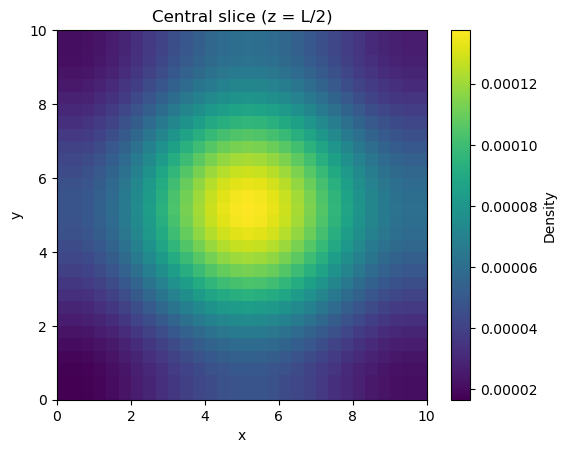

In [93]:
L = 10
N = 30          
dx = L / N
D = 1.0
dt = 0.15 * dx**2 / D   # stable for 3D
steps = 200
alpha = D * dt / dx**2

x = np.linspace(0, L, N)
rho = np.zeros((N, N, N))

# Initial condition
rho[N//2, N//2, N//2] = 1.0

# Time evolution
for n in range(steps):
    rho_new = rho.copy()
    
    rho_new[1:-1,1:-1,1:-1] = (
        rho[1:-1,1:-1,1:-1]
        + alpha * (
            rho[2:,1:-1,1:-1] + rho[:-2,1:-1,1:-1]
          + rho[1:-1,2:,1:-1] + rho[1:-1,:-2,1:-1]
          + rho[1:-1,1:-1,2:] + rho[1:-1,1:-1,:-2]
          - 6 * rho[1:-1,1:-1,1:-1]
        )
    )

    rho_new[0,:,:]   = rho_new[1,:,:]
    rho_new[-1,:,:]  = rho_new[-2,:,:]
    rho_new[:,0,:]   = rho_new[:,1,:]
    rho_new[:,-1,:]  = rho_new[:,-2,:]
    rho_new[:,:,0]   = rho_new[:,:,1]
    rho_new[:,:,-1]  = rho_new[:,:,-2]

    rho = rho_new

plt.imshow(rho[:, :, N//2], origin='lower', extent=[0,L,0,L])
plt.colorbar(label="Density")
plt.title("Central slice (z = L/2)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

With absorbing walls

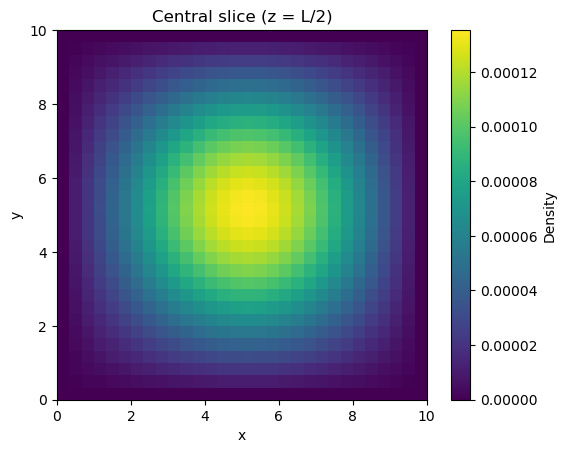

In [94]:
L = 10
N = 30          
dx = L / N
D = 1.0
dt = 0.15 * dx**2 / D   # stable for 3D
steps = 200
alpha = D * dt / dx**2

x = np.linspace(0, L, N)
rho = np.zeros((N, N, N))

# Initial condition
rho[N//2, N//2, N//2] = 1.0

# Time evolution
for n in range(steps):
    rho_new = rho.copy()
    
    rho_new[1:-1,1:-1,1:-1] = (
        rho[1:-1,1:-1,1:-1]
        + alpha * (
            rho[2:,1:-1,1:-1] + rho[:-2,1:-1,1:-1]
          + rho[1:-1,2:,1:-1] + rho[1:-1,:-2,1:-1]
          + rho[1:-1,1:-1,2:] + rho[1:-1,1:-1,:-2]
          - 6 * rho[1:-1,1:-1,1:-1]
        )
    )

    rho_new[0,:,:]   = 0
    rho_new[-1,:,:]  = 0
    rho_new[:,0,:]   = 0
    rho_new[:,-1,:]  = 0
    rho_new[:,:,0]   = 0
    rho_new[:,:,-1]  = 0

    rho = rho_new

plt.imshow(rho[:, :, N//2], origin='lower', extent=[0,L,0,L])
plt.colorbar(label="Density")
plt.title("Central slice (z = L/2)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Laminar Pipe Flow 

**Equation:**  
$$
\frac{1}{r} \frac{d}{dr} \Big( r \frac{du}{dr} \Big) = \frac{1}{\mu} \frac{dP}{dz}
$$

**Analytical Solution:**  
$$
u(r) = \frac{\Delta P}{4 \mu L} \left(R^2 - r^2 \right), \quad
u_{\max} = \frac{\Delta P R^2}{4 \mu L}, \quad
\bar{u} = \frac{1}{2} u_{\max}
$$

**Finite Difference Discretization:**  
$$
\frac{u_{i+1} - 2 u_i + u_{i-1}}{\Delta r^2} + \frac{1}{r_i} \frac{u_{i+1}-u_{i-1}}{2 \Delta r} = S, \quad
S = \frac{1}{\mu} \frac{dP}{dz}
$$

**Boundary Implementation (FDM):**  
- Centerline symmetry: $$u_1 - u_{-1} = 0 \Rightarrow u_{-1} = u_1$$
- Wall no-slip: $$u_{N-1} = 0$$




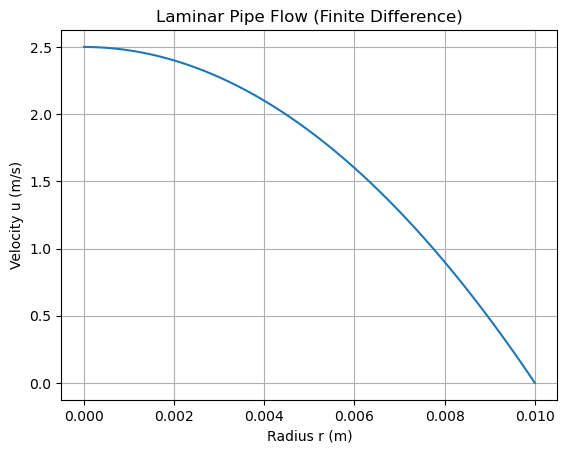

In [95]:
R = 0.01         # pipe radius (m)
mu = 0.001       # viscosity (Pa.s)
dPdz = -100      # pressure gradient (Pa/m)
N = 100          # number of points

dr = R/(N-1)
r = np.linspace(0, R, N)
S = dPdz / mu

# Coefficient matrix
A = np.zeros((N,N))
b = np.ones(N)*S

# Interior points
for i in range(1,N-1):
    a = 1 - dr/(2*r[i])
    c = 1 + dr/(2*r[i])
    A[i,i-1] = a
    A[i,i] = -2
    A[i,i+1] = c
 
b[-1] = 0 

# Boundary conditions
A[0,0] = -2
A[0,1] = 2

A[-1,-1] = 1
A[-1,-2] = 0

u = np.linalg.solve(A, b) * dr**2

plt.plot(r, u)
plt.xlabel("Radius r (m)")
plt.ylabel("Velocity u (m/s)")
plt.title("Laminar Pipe Flow (Finite Difference)")
plt.grid()
plt.show()
